# Mono resistance EDA

In this POC, we gloss over the resistance towards distinct drugs and focus only on the mono-resistance.


In [60]:

from __future__ import print_function
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
sns.set_context('paper')



def print_ln():
    print('-' * 80, '\n')


DATA_LOCATION  = "../../data/"

## EDA for Tb-profiler results

In [61]:
# Read data for ALL genomes in the cohort

tbprofiler_df = pd.read_json(DATA_LOCATION + "raw/cohort.tbprofiler.json", encoding="UTF-8")
tbprofiler_df = tbprofiler_df.transpose()
tbprofiler_df.head()


,MDR,XDR,amikacin,aminoglycosides,bedaquiline,capreomycin,ciprofloxacin,clofazimine,cycloserine,delamanid,...,levofloxacin,linezolid,main_lin,moxifloxacin,ofloxacin,para-aminosalicylic_acid,pyrazinamide,rifampicin,streptomycin,sublin
ERR027458,R,,-,-,-,-,-,-,-,-,...,-,-,lineage2,-,-,-,-,"rpoB_p.Ser450Leu, rpoB_p.Glu761Asp",rrs_r.517c>t,lineage2.2.1
ERR027459,,,-,-,-,-,-,-,-,-,...,-,-,lineage2,-,-,-,-,rpoB_p.Leu430Pro,-,lineage2.2.1
ERR027460,,,-,-,-,-,-,-,-,-,...,-,-,,-,-,-,-,-,-,
ERR027461,,,-,-,-,-,-,-,-,-,...,-,-,lineage2,-,-,-,-,-,-,lineage2.2.1
ERR027462,,,-,-,-,-,-,-,-,-,...,-,-,lineage2,-,-,-,-,-,-,lineage2.2.1


In [62]:
tbprofiler_df.shape

(2654, 26)

In [64]:
# Select the train (Tb-portals) data

# Read the genomes IDs of genomes
# - Tb-portals (ALL/ Train)
# - HTBC (ALL/ Test)

import json

with open(DATA_LOCATION + "raw/test_train_genome_ids.json") as f:
    all_genomes_ids_dict = json.load(f)

final_tbportals_train_genome_ids =  all_genomes_ids_dict['final_tbportals_train_genomes']
final_htbc_test_genome_ids = all_genomes_ids_dict['final_htbc_test_genomes']


In [70]:
# Read the binarized tb_profiler results from step-002

binarized_resistance_status_df = pd.read_csv(DATA_LOCATION +  "processed/binarized_resistance_status_df.tsv", "\t").rename(columns={'Unnamed: 0' : 'SampleID'}).set_index('SampleID')

binarized_resistance_status_df.head(10)


,rifampicin_resistance,isoniazid_resistance,pyrazinamide_resistance,ethambutol_resistance,streptomycin_resistance,fluoroquinolones_resistance,moxifloxacin_resistance,ofloxacin_resistance,levofloxacin_resistance,ciprofloxacin_resistance,...,linezolid_resistance,bedaquiline_resistance,clofazimine_resistance,delamanid_resistance,main_lin,sublin,drtype,MDR,XDR,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
SRR1162996,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,lineage4,lineage4.3.3,XDR,R,R,Resistant
SRR6356985,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,lineage2,lineage2.2.1,MDR,R,NaN,Resistant
SRR10525347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,lineage4,lineage4.1.2.1,Sensitive,NaN,NaN,Sensitive
SRR5153132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,lineage4,lineage4.1.2.1,Sensitive,NaN,NaN,Sensitive
SRR10380131,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,lineage2,lineage2.2.1,MDR,R,NaN,Resistant
SRR1163399,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,lineage4,lineage4.3.3,XDR,R,R,Resistant
SRR5153316,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,lineage4,lineage4.2.1,MDR,R,NaN,Resistant
SRR10525375,1,1,1,1,0,1,1,1,1,1,...,0,0,0,0,lineage4,lineage4.1.2.1,MDR,R,NaN,Resistant
SRR10525332,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,lineage4,lineage4.8,MDR,R,NaN,Resistant


#### Create data frame for train dataset


In [71]:
binarized_resistance_status_train_df = binarized_resistance_status_df.loc[final_tbportals_train_genome_ids]
binarized_resistance_status_train_df.head()


,rifampicin_resistance,isoniazid_resistance,pyrazinamide_resistance,ethambutol_resistance,streptomycin_resistance,fluoroquinolones_resistance,moxifloxacin_resistance,ofloxacin_resistance,levofloxacin_resistance,ciprofloxacin_resistance,...,linezolid_resistance,bedaquiline_resistance,clofazimine_resistance,delamanid_resistance,main_lin,sublin,drtype,MDR,XDR,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
SRR10525336,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,lineage4,lineage4.4.1.1,MDR,R,NaN,Resistant
SRR10380004,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,lineage4,lineage4.2.1,MDR,R,NaN,Resistant
SRR6807701,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,lineage2,lineage2.2.1,MDR,R,NaN,Resistant
SRR11033700,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,lineage4,lineage4.3.3,Drug-resistant,NaN,NaN,Resistant
SRR1163101,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,lineage2,lineage2.2.1,XDR,R,R,Resistant


#### Create data frame for test dataset


In [72]:
binarized_resistance_status_test_df = binarized_resistance_status_df.loc[final_htbc_test_genome_ids]
binarized_resistance_status_test_df.head()

,rifampicin_resistance,isoniazid_resistance,pyrazinamide_resistance,ethambutol_resistance,streptomycin_resistance,fluoroquinolones_resistance,moxifloxacin_resistance,ofloxacin_resistance,levofloxacin_resistance,ciprofloxacin_resistance,...,linezolid_resistance,bedaquiline_resistance,clofazimine_resistance,delamanid_resistance,main_lin,sublin,drtype,MDR,XDR,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
ERR3335735,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,lineage3,lineage3,MDR,R,NaN,Resistant
SRR8552929,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,lineage4,lineage4.9,MDR,R,NaN,Resistant
ERR067629,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,lineage4,lineage4.2.1,MDR,R,NaN,Resistant
ERR067714,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,lineage2,lineage2.2.1,MDR,R,NaN,Resistant
SRR5065314,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,lineage2,lineage2.2.1,Drug-resistant,NaN,NaN,Resistant


#### Analyze the train and test datasets

In [73]:
binarized_resistance_status_train_df.describe().T


,count,mean,std,min,25%,50%,75%,max
rifampicin_resistance,1223.0,0.604252,0.489211,0.0,0.0,1.0,1.0,1.0
isoniazid_resistance,1223.0,0.618152,0.486038,0.0,0.0,1.0,1.0,1.0
pyrazinamide_resistance,1223.0,0.407195,0.491513,0.0,0.0,0.0,1.0,1.0
ethambutol_resistance,1223.0,0.545380,0.498140,0.0,0.0,1.0,1.0,1.0
streptomycin_resistance,1223.0,0.567457,0.495631,0.0,0.0,1.0,1.0,1.0
fluoroquinolones_resistance,1223.0,0.318888,0.466236,0.0,0.0,0.0,1.0,1.0
moxifloxacin_resistance,1223.0,0.318888,0.466236,0.0,0.0,0.0,1.0,1.0
ofloxacin_resistance,1223.0,0.318888,0.466236,0.0,0.0,0.0,1.0,1.0
levofloxacin_resistance,1223.0,0.318888,0.466236,0.0,0.0,0.0,1.0,1.0
ciprofloxacin_resistance,1223.0,0.318888,0.466236,0.0,0.0,0.0,1.0,1.0


#### Resistance and Sensitive genomes


<AxesSubplot:>

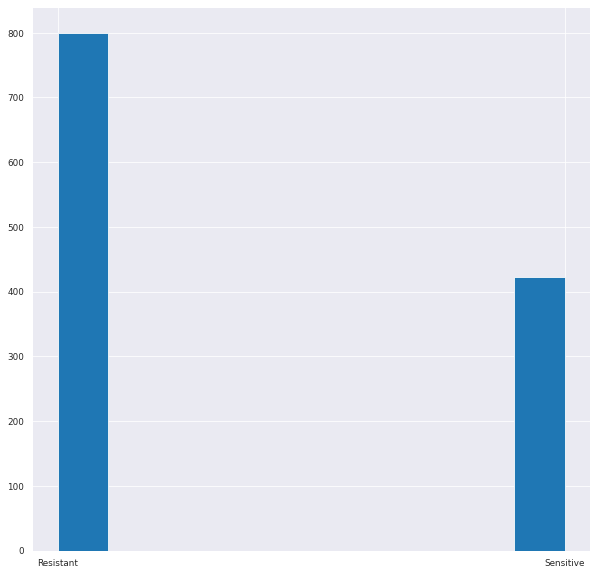

In [75]:
binarized_resistance_status_train_df['Resistance_Status'].hist(figsize=(10,10))


<AxesSubplot:>

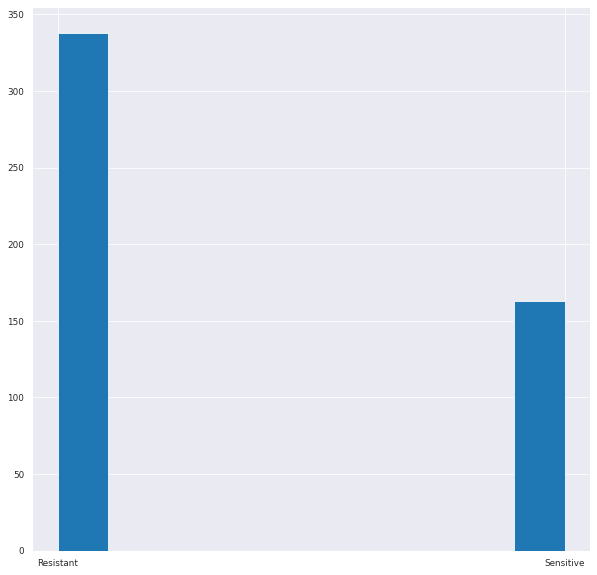

In [76]:
binarized_resistance_status_test_df['Resistance_Status'].hist(figsize=(10,10))


#### Lineage distribution


<AxesSubplot:>

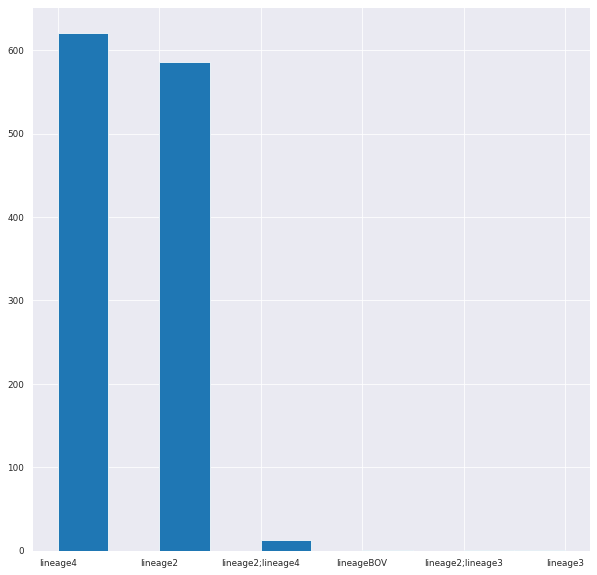

In [77]:
binarized_resistance_status_train_df['main_lin'].hist(figsize=(10,10))


<AxesSubplot:>

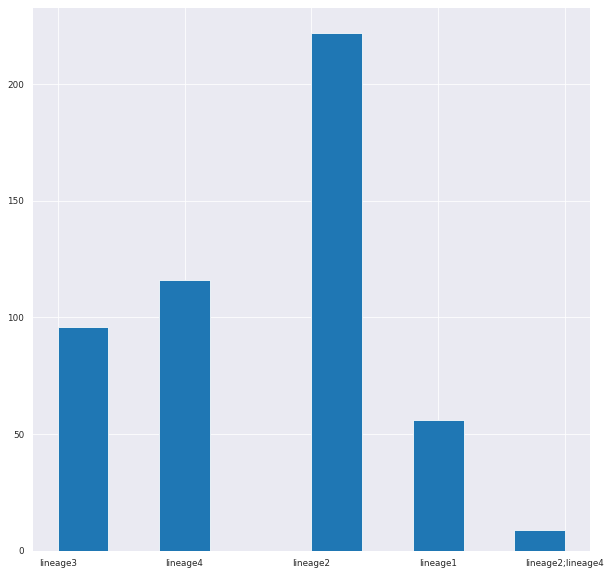

In [78]:
binarized_resistance_status_test_df['main_lin'].hist(figsize=(10,10))


#### Find the relationship between drtype and main_lin variables

In [20]:
binarized_resistance_status_train_df.groupby(['drtype','main_lin']).size()

drtype          main_lin         
Drug-resistant  lineage2              30
                lineage2;lineage4      1
                lineage4              48
                lineageBOV             1
MDR             lineage2             261
                lineage2;lineage3      1
                lineage2;lineage4      5
                lineage4             161
Sensitive       lineage2             125
                lineage3               1
                lineage4             296
XDR             lineage2             170
                lineage2;lineage4      6
                lineage4             116
dtype: int64

In [21]:
binarized_resistance_status_test_df.groupby(['drtype','main_lin']).size()

drtype          main_lin         
Drug-resistant  lineage1             14
                lineage2             62
                lineage3             11
                lineage4             25
MDR             lineage1              6
                lineage2             74
                lineage2;lineage4     6
                lineage3             51
                lineage4             38
Sensitive       lineage1             35
                lineage2             66
                lineage2;lineage4     2
                lineage3              9
                lineage4             49
XDR             lineage1              1
                lineage2             20
                lineage2;lineage4     1
                lineage3             25
                lineage4              4
dtype: int64

#### Stacked Column Chart: visual form of the two-way table


<AxesSubplot:xlabel='main_lin'>

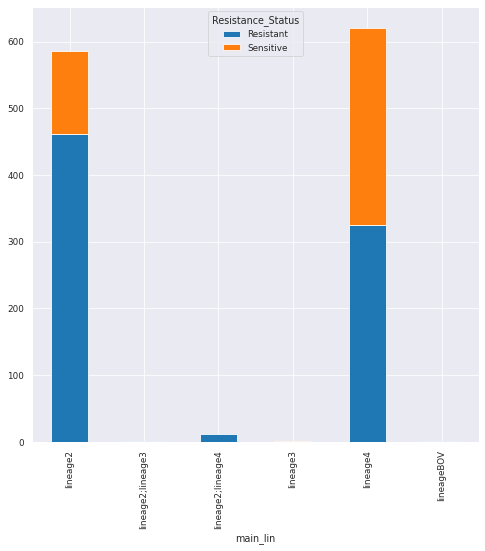

In [79]:
# binarized_resistance_status_train_df.groupby(['drtype','sublin']).size()

pd.crosstab(index= binarized_resistance_status_train_df['main_lin'], columns=binarized_resistance_status_train_df["Resistance_Status"]).plot(kind="bar", figsize=(8,8), stacked=True)

<AxesSubplot:xlabel='main_lin'>

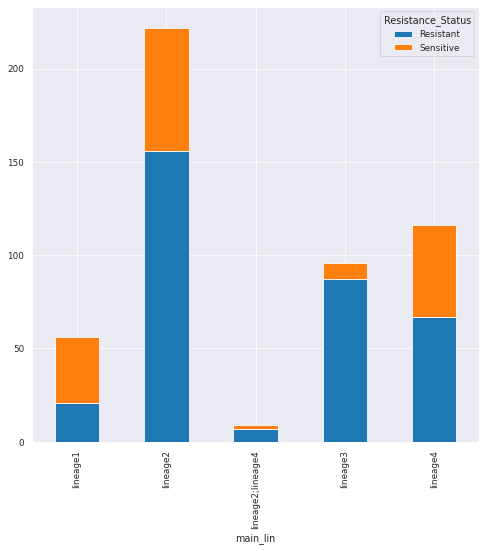

In [80]:
pd.crosstab(index= binarized_resistance_status_test_df['main_lin'], columns=binarized_resistance_status_test_df["Resistance_Status"]).plot(kind="bar", figsize=(8,8), stacked=True)

## EDA for genomic pre-processing results
